In [1]:
import sys
sys.path.insert(0, '..')
from visualization import test_classification_separation, plot_k_series_with_shaps

In [2]:
import copy
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
df = pd.read_csv('../data/sin_synth/SIN_RANDY_NONOISE_500.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,error,label
0,176.107856,-38.292281,-83.633367,-130.510875,45.917780,-198.701307,27.789212,-14.355077,32.489286,38.293906,...,8.267257,115.987310,-16.361367,-16.296124,-0.519341,57.189860,-62.385178,163.477655,0.593159,0.0
1,100.961410,114.652989,16.501596,122.400534,269.075282,-11.194462,137.764530,-120.118107,-106.206571,236.171774,...,1.452680,-64.936704,-53.720485,10.504204,-19.586896,50.286487,-69.378273,127.678153,0.460127,0.0
2,-34.271320,48.175821,107.899320,-52.795608,30.277780,-41.432483,34.452543,6.573040,-63.255035,14.422148,...,-47.087189,110.905690,-39.843555,-41.198753,25.415166,23.234761,158.668992,-177.656889,0.377501,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.700083
std        0.210911
min        0.200191
25%        0.500853
50%        0.767173
75%        0.898267
max        0.996475
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
X = df.drop(columns=['error', 'label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
from gendis.genetic import GeneticExtractor
from gendis.fitness import logloss_fitness

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
args = {
    "fitness": logloss_fitness,
    "dist_function": "dtw",
    "apply_differencing": True,
    "population_size": 100,
    "max_shaps": 10,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [12]:
gendis.__dict__

{'dist_function': <function gendis.shapelets_distances.dtw(timeseries_matrix, shaps, distances)>,
 'dist_func_returns': True,
 'fitness': <function gendis.fitness.logloss_fitness(D, y, verbose=False, return_info=False, shaps=None)>,
 'apply_differencing': True,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 0,
 'max_len': None,
 'max_shaps': 10,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis

In [13]:
%%time
gendis.fit(X_train, y_train)

it		avg		max		time
1		-0.0575		-2e-06	1.9967
2		-0.0025		-2e-06	2.2131
3		-0.0		-2e-06	1.7901
4		-0.0		-2e-06	1.9484
5		-0.0		-1e-06	1.8735
6		-0.0		-1e-06	2.0946
7		-0.0		-1e-06	1.9672
8		-0.0		-1e-06	2.1259
9		-0.0		-1e-06	1.7534
10		-0.0		-1e-06	1.6872
11		-0.0		-1e-06	1.7416
12		-0.0		-1e-06	1.6635
13		-0.0		-1e-06	1.79
14		-0.0		-1e-06	1.7425
15		-0.0		-1e-06	2.0279
16		-0.0		-1e-06	1.7093
17		-0.0		-1e-06	1.9017
18		-0.0		-1e-06	1.7889
19		-0.0		-1e-06	2.0703
20		-0.0		-1e-06	2.0266
21		-0.0		-1e-06	1.9244
22		-0.0		-1e-06	2.07
23		-0.0		-1e-06	2.0486
24		-0.0		-1e-06	2.0592
25		-0.0		-1e-06	2.1467
26		-0.0		-1e-06	2.7272
27		-0.0		-1e-06	2.3858
28		-0.0		-1e-06	2.504
29		-0.0		-1e-06	2.6985
30		-0.0		-1e-06	2.6983
31		-0.0		-1e-06	2.481
32		-0.0		-0.0	2.6523
33		-0.0		-0.0	2.648
34		-0.0		-0.0	2.6883
35		-0.0		-0.0	2.6009
36		-0.0		-0.0	2.8027
37		-0.0		-0.0	3.1017
38		-0.0		-0.0	2.7821
39		-0.0		-0.0	2.7633
40		-0.0		-0.0	3.0569
41		-0.0		-0.0	2.8086
42		-0.0		-0.0	2.9893
43		-

In [14]:
%%time
distances = gendis.transform(X)
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 2.21 s, sys: 11.9 ms, total: 2.22 s
Wall time: 2.21 s


In [15]:
distances['label'] = df['label']

In [16]:
import importlib
import sys
importlib.reload(sys.modules['visualization'])
from visualization import test_classification_separation, plot_k_series_with_shaps

Testing separation for shapelet 0
Accuracy = 1.0
[[200   0]
 [  0 200]]


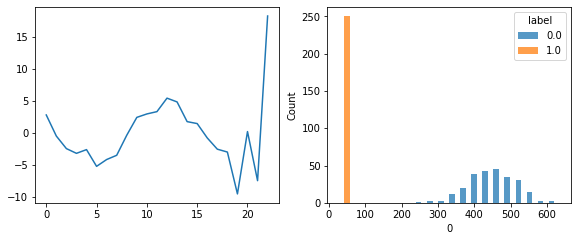

Testing separation for shapelet 1
Accuracy = 1.0
[[200   0]
 [  0 200]]


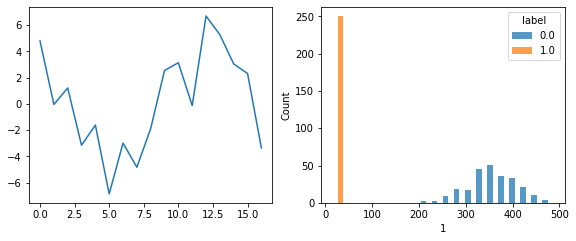

Testing separation for shapelet 2
Accuracy = 1.0
[[200   0]
 [  0 200]]


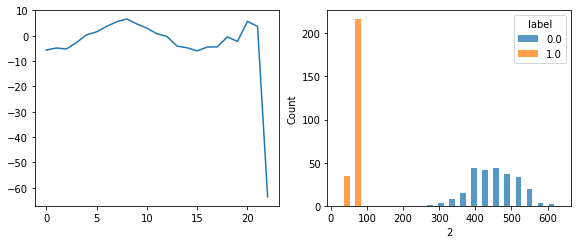

Testing separation for shapelet 3
Accuracy = 1.0
[[200   0]
 [  0 200]]


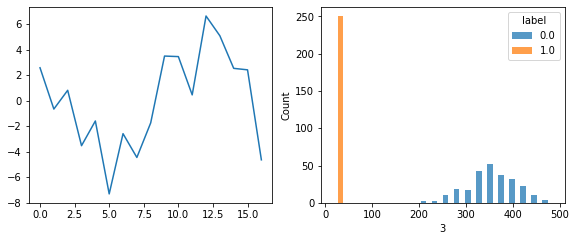

Testing separation for shapelet 4
Accuracy = 1.0
[[200   0]
 [  0 200]]


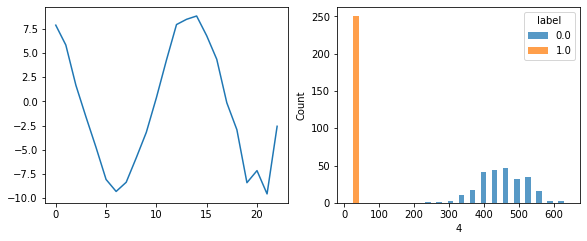

Testing separation for shapelet 5
Accuracy = 1.0
[[200   0]
 [  0 200]]


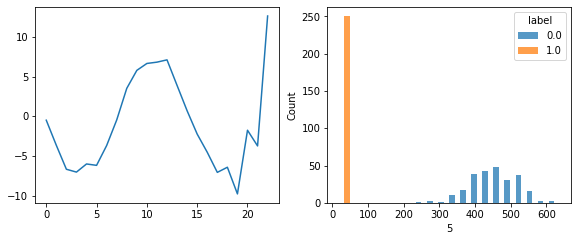

Testing separation for shapelet 6
Accuracy = 1.0
[[200   0]
 [  0 200]]


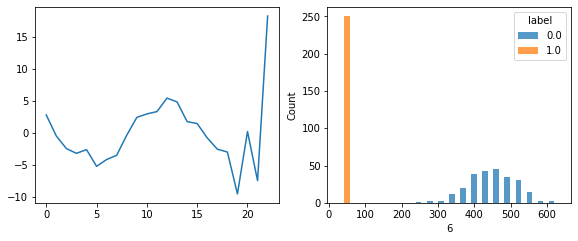

Testing separation for shapelet 7
Accuracy = 0.48
[[108  92]
 [116  84]]


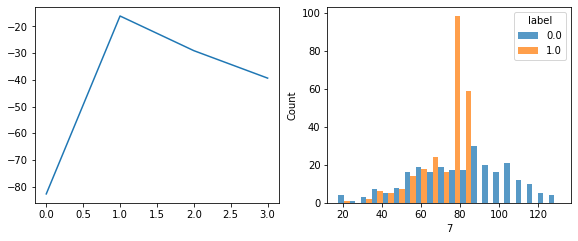

Testing separation for shapelet 8
Accuracy = 0.9925
[[197   3]
 [  0 200]]


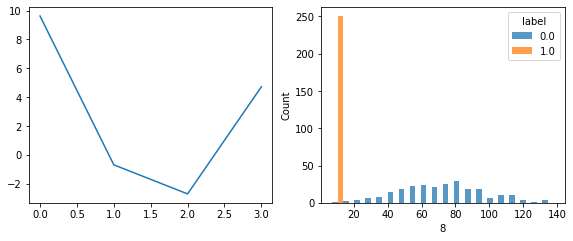

Testing separation for shapelet 9
Accuracy = 0.9925
[[197   3]
 [  0 200]]


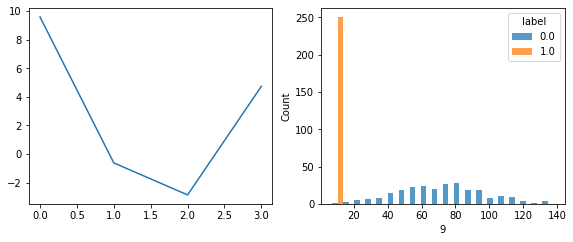

Testing separation for shapelet 10
Accuracy = 1.0
[[200   0]
 [  0 200]]


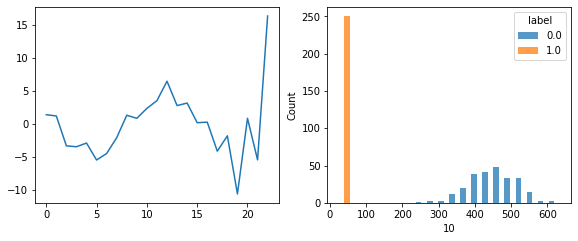

Testing separation for shapelet 11
Accuracy = 1.0
[[200   0]
 [  0 200]]


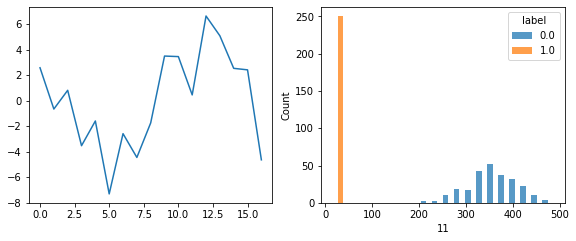

Testing separation for shapelet 12
Accuracy = 1.0
[[200   0]
 [  0 200]]


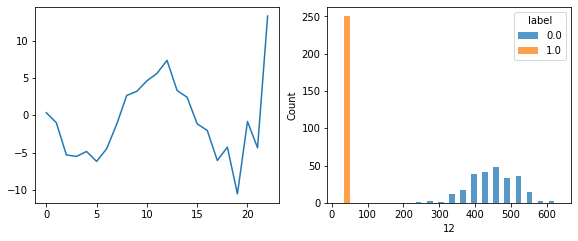

Testing separation for shapelet 13
Accuracy = 1.0
[[200   0]
 [  0 200]]


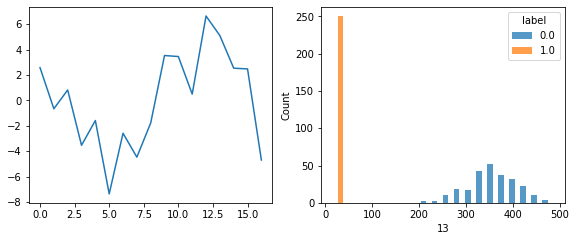

In [17]:
for i, shap in enumerate(gendis.best["shapelets"], start=0):
    test_classification_separation(
        D=distances, 
        y=y, 
        d_train=distances_train, 
        d_test=distances_test, 
        shap=shap, 
        shap_id=i,
        plot_sin_y=False,
    )